In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv('student-mat.csv',sep=';')

In [3]:
data.columns.tolist()

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [4]:
data.shape

(395, 33)

In [5]:
data=data[['G1', 'G2','G3','studytime','failures', 
           'absences' ,'freetime','health','traveltime']]

In [6]:
data.head()

,G1,G2,G3,studytime,failures,absences,freetime,health,traveltime
0,5,6,6,2,0,6,3,3,2
1,5,5,6,2,0,4,3,3,1
2,7,8,10,2,3,10,3,3,1
3,15,14,15,3,0,2,2,5,1
4,6,10,10,2,0,4,3,5,1


In [7]:
data.columns.tolist()

['G1',
 'G2',
 'G3',
 'studytime',
 'failures',
 'absences',
 'freetime',
 'health',
 'traveltime']

In [8]:
data.shape

(395, 9)

In [9]:
# To Predict the Final Grade (G3)
predict='G3'

In [10]:
x=np.array(data.drop(labels=[predict],axis=1))
y=np.array(data[predict])

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [14]:
for i in range(20):
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    lr_model=LinearRegression()
    lr_model.fit(x_train,y_train)
    acc=lr_model.score(x_test,y_test)
    print(acc)
    if acc>0.90 :

        with open('performance.pickle','wb') as file:
            pickle.dump(lr_model,file)
            break

0.8430588041408805
0.8820261792628546
0.7452448913776102
0.807100330849351
0.888965500046465
0.7375275774532934
0.7490239391370428
0.8896382133418281
0.9026114767388553


In [16]:
pickle_in=open('performance.pickle','rb')
lr_model=pickle.load(pickle_in)

In [17]:
acc=lr_model.score(x_test,y_test)
print(acc)

0.9026114767388553


In [18]:
coeff=lr_model.coef_
intercept=lr_model.intercept_

In [19]:
print(coeff,'\n',intercept)

[ 0.16301442  0.98054224 -0.19062904 -0.33897335  0.04103866  0.10603499
  0.07454836  0.14670015] 
 -2.539748252083575


In [20]:
predictions=lr_model.predict(x_test)

In [21]:
for i in range(len(predictions)):
    if i==10:
        break
    print(predictions[i], x_test[i] , y_test[i])

17.034847102264003 [16 17  3  0  0  4  4  1] 17
12.790075694439723 [12 13  2  0 14  2  1  1] 12
10.62092314157422 [11 11  1  0  0  1  5  2] 10
14.651744458449075 [14 15  2  0  0  2  3  1] 16
14.006881848181399 [14 14  1  0  2  4  1  1] 13
12.648517693262033 [10 13  1  0  4  3  5  1] 14
11.811024368941888 [12 12  1  0  4  2  2  2] 13
10.683776262261068 [11 11  2  0  2  4  5  1] 11
6.750821045474071 [10  8  1  3  3  5  3  1] 7
7.647178629865497 [ 7  8  2  0 12  4  5  2] 8


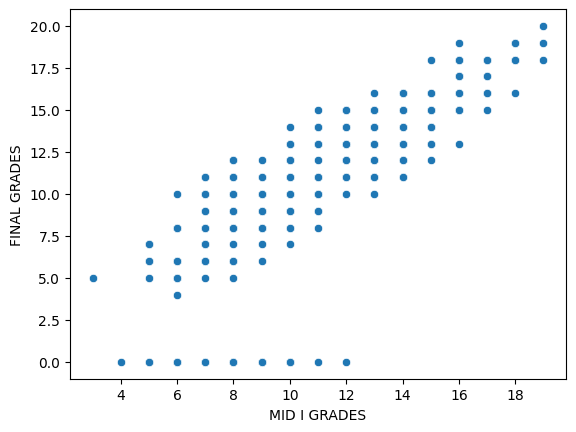

In [22]:
ax=sns.scatterplot(x=data['G1'], y=data['G3'])
ax.set_xlabel('MID I GRADES')
ax.set_ylabel('FINAL GRADES')
plt.show()

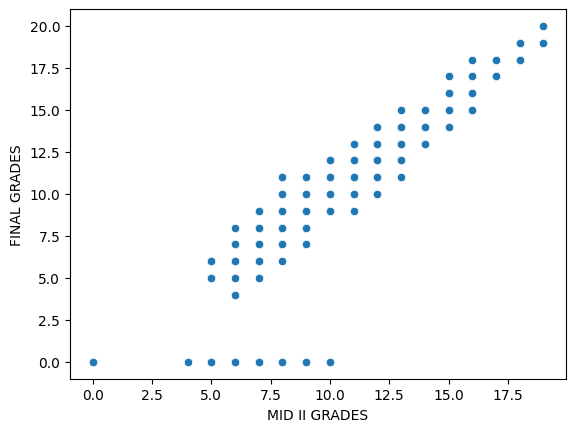

In [23]:
ax=sns.scatterplot(x=data['G2'], y=data['G3'])
ax.set_xlabel('MID II GRADES')
ax.set_ylabel('FINAL GRADES')
plt.show()

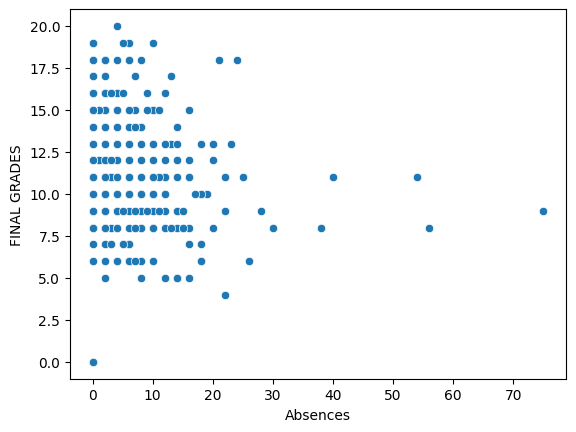

In [24]:
ax=sns.scatterplot(x=data['absences'], y=data['G3'])
ax.set_xlabel('Absences')
ax.set_ylabel('FINAL GRADES')
plt.show()

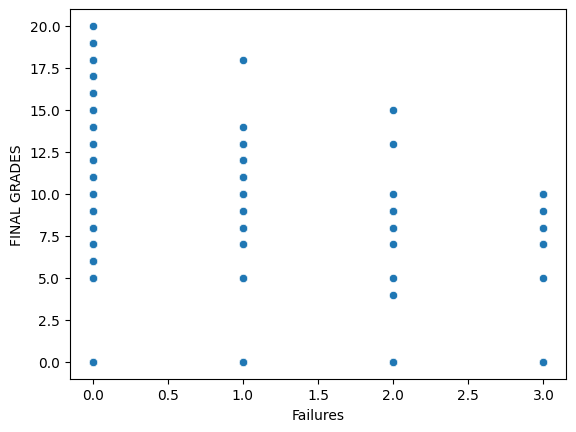

In [25]:
ax=sns.scatterplot(x=data['failures'], y=data['G3'])
ax.set_xlabel('Failures')
ax.set_ylabel('FINAL GRADES')
plt.show()

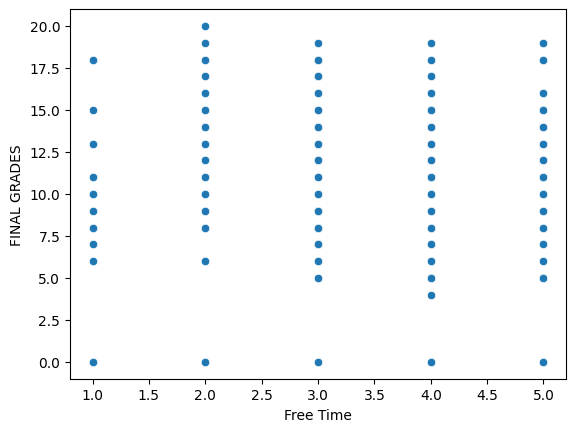

In [26]:
ax=sns.scatterplot(x=data['freetime'], y=data['G3'])
ax.set_xlabel('Free Time')
ax.set_ylabel('FINAL GRADES')
plt.show()

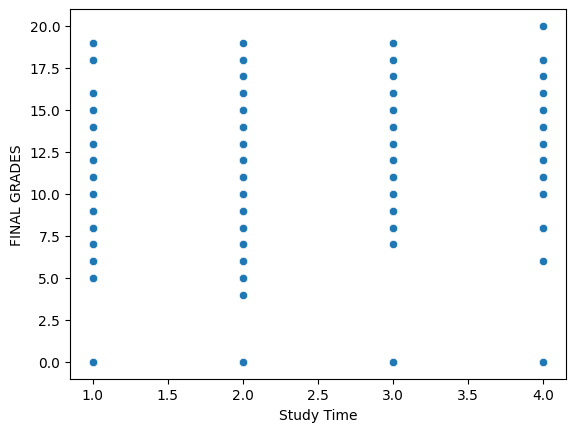

In [27]:
ax=sns.scatterplot(x=data['studytime'], y=data['G3'])
ax.set_xlabel('Study Time')
ax.set_ylabel('FINAL GRADES')
plt.show()

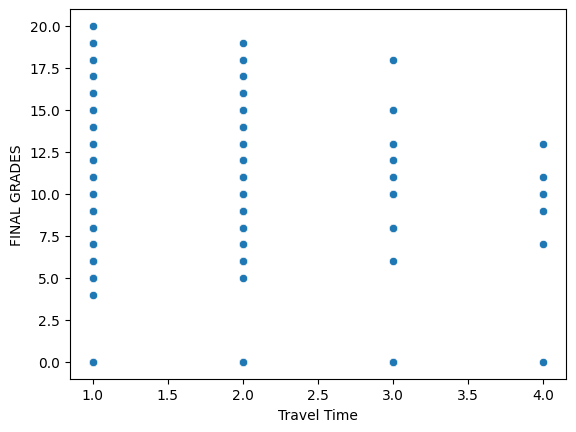

In [28]:
ax=sns.scatterplot(x=data['traveltime'], y=data['G3'])
ax.set_xlabel('Travel Time')
ax.set_ylabel('FINAL GRADES')
plt.show()